# Handling Graphs with NetworkX

Python offers the library NetworkX for manipulating graphs. You can learn more here: 

https://networkx.github.io/

https://networkx.github.io/documentation/stable/tutorial.html

In [73]:
import networkx as nx
%matplotlib inline

### Creating a graph

In [74]:
G = nx.Graph()

Add nodes to the graph

In [76]:
G.add_node(1)
G.add_nodes_from([2,3])
G.add_node('Alice')
G.add_node('Bob')
print(G.nodes())

[1, 2, 3, 'Alice', 'Bob']


Draw the graph

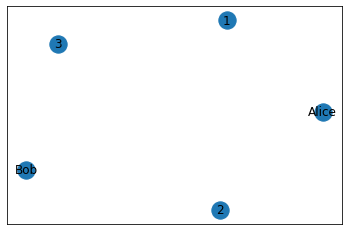

In [77]:
nx.draw_networkx(G)

Add edges to the graph

In [78]:
G.add_edge(1,2)
G.add_edges_from([(1,3),('Alice','Bob')])
e = (1,'Alice')
G.add_edge(*e)

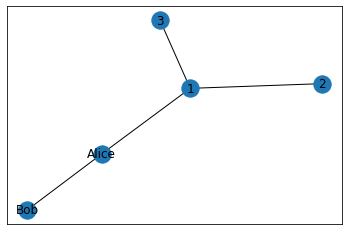

In [79]:
nx.draw_networkx(G)

Adding an edge with a new node will create the node Charlie in the graph

[(1, 2), (1, 3), (1, 'Alice'), ('Alice', 'Bob'), ('Alice', 'Charlie')]
[1, 2, 3, 'Alice', 'Bob', 'Charlie']


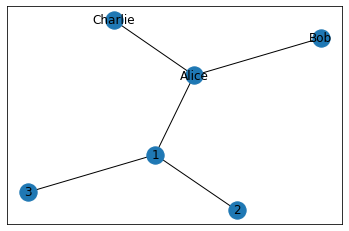

In [80]:
G.add_edge('Alice','Charlie')
print(G.edges())
print(G.nodes())
nx.draw_networkx(G)

A graph is a dictionary with nodes as the keys

Each node is a dictionary with the neighbors as the keys, and the edge properties as values

In [86]:
type(G)

networkx.classes.graph.Graph

In [81]:
G[1]

AtlasView({2: {}, 3: {}, 'Alice': {}})

In [87]:
print(G.nodes)
print(G.edges)

[1, 2, 3, 'Alice', 'Bob', 'Charlie']
[(1, 2), (1, 3), (1, 'Alice'), ('Alice', 'Bob'), ('Alice', 'Charlie')]


In [88]:
print(G.nodes[1])

{}


Creating a graph from edges

[1, 2, 3, 'Alice', 'Bob']
[(1, 2), (1, 3), (1, 'Alice'), ('Alice', 'Bob')]


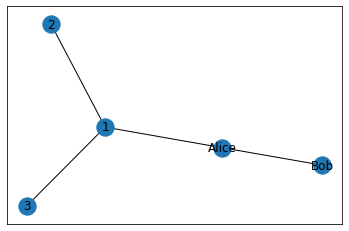

In [91]:
G2 = nx.Graph()
G2.add_edges_from([(1,2),(1,3),('Alice','Bob'),(1,'Alice')])
print(G2.nodes())
print(G2.edges())
nx.draw_networkx(G2)

[2, 'Alice', 'Bob']
[('Alice', 'Bob')]


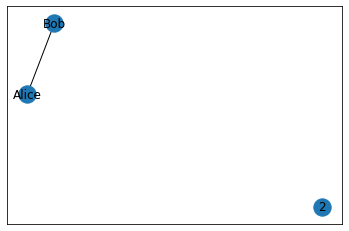

In [90]:
G2.remove_edge(1,3)
G2.remove_node(3)
G2.remove_node(1)
print(G2.nodes())
print(G2.edges())
nx.draw_networkx(G2)

Reading a graph from a file with list of edges

https://networkx.org/documentation/stable/reference/readwrite/index.html

['1', '2', '3', 'Alice', 'Bob', 'Charlie']
[('1', '2'), ('1', '3'), ('1', 'Alice'), ('2', '3'), ('Alice', 'Bob'), ('Bob', 'Charlie')]


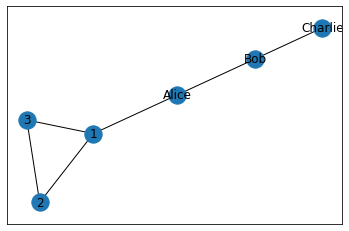

In [93]:
#Read a graph from a list of edges
G3 = nx.read_edgelist('graph_edges.txt')
print(G3.nodes())
print(G3.edges())
nx.draw_networkx(G3)

### Graph attributes

You can assign attributes and values to the nodes and edges of the graph

In [94]:
G3.nodes['Alice']['gender'] = 'female'
G3.nodes['Bob']['gender'] = 'male'
G3.nodes['Charlie']['gender'] = 'male'
G3.nodes['1']['value'] = 1
G3.nodes['2']['value'] = -1
G3.nodes['3']['value'] = 0
for n in G3.nodes():
    print(G3.nodes[n]) 

{'value': 1}
{'value': -1}
{'value': 0}
{'gender': 'female'}
{'gender': 'male'}
{'gender': 'male'}


In [95]:
for n in G3.nodes():
    print(G3[n])

{'2': {}, '3': {}, 'Alice': {}}
{'1': {}, '3': {}}
{'1': {}, '2': {}}
{'Bob': {}, '1': {}}
{'Alice': {}, 'Charlie': {}}
{'Bob': {}}


In [96]:
G3.nodes['Alice']['value'] = 1
G3.nodes['Bob']['value'] = -1
G3.nodes['Charlie']['value'] = 1
for n in G3.nodes():
    print(n+ ":" + str(G3.nodes[n]['value']))

for n in G3.nodes():
    print(n,G3.nodes[n])

1:1
2:-1
3:0
Alice:1
Bob:-1
Charlie:1
1 {'value': 1}
2 {'value': -1}
3 {'value': 0}
Alice {'gender': 'female', 'value': 1}
Bob {'gender': 'male', 'value': -1}
Charlie {'gender': 'male', 'value': 1}


In [18]:
G3['Alice']['Bob']['label'] = 'strong'
print(G3['Bob']['Alice'])
print(G3['Alice'])
print(G3['Bob'])

{'label': 'strong'}
{'Bob': {'label': 'strong'}, '1': {}}
{'Alice': {'label': 'strong'}, 'Charlie': {}}


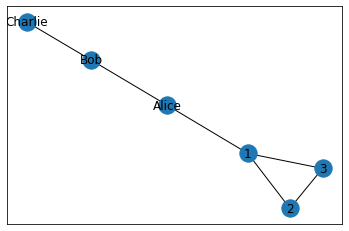

In [99]:
nx.draw_networkx(G3, with_labels=True)

### Weighted graphs

A special attribute of a an edge is the "weight". When adding weighted edges, you enter triples consisting of the two edge endpoints and the weight of the edge. This weight is stored in an attribute "weight" by default.

In [100]:
G4 = nx.Graph()
G4.add_weighted_edges_from([(1,2,0.5),(2,3,0.1),(3,4,0.7)])
for (a,b) in G4.edges():
    print (G4[a][b])
for (a,b,w) in G4.edges(data =True): #data=True returns weight as well
    print (str(a)+" "+ str(b) + " " + str(w['weight']))
for n in G4:
    print(G4[n])

{'weight': 0.5}
{'weight': 0.1}
{'weight': 0.7}
1 2 0.5
2 3 0.1
3 4 0.7
{2: {'weight': 0.5}}
{1: {'weight': 0.5}, 3: {'weight': 0.1}}
{2: {'weight': 0.1}, 4: {'weight': 0.7}}
{3: {'weight': 0.7}}


### Directed Graphs ###

[(1, 2), (1, 4), (3, 1)]
{2: {'weight': 0.5}, 4: {'weight': 0.1}}
{}
{1: {'weight': 0.75}}
{}


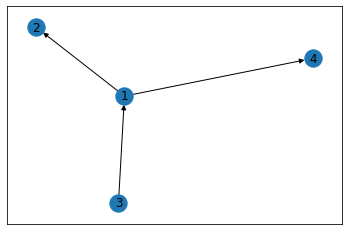

In [21]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75), (1,4,0.1)])
print(DG.edges())
for n in DG:
    print(DG[n])
nx.draw_networkx(DG)

### Graph Operations ###

Some common graph operations and algorithms are implemented in networkx library.

http://networkx.readthedocs.io/en/networkx-1.11/reference/algorithms.html

Neighbors, degrees and adjancency matrix

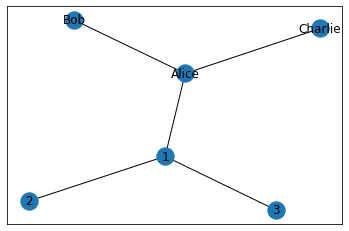

In [103]:
nx.draw_networkx(G)

In [109]:
print(G.neighbors(1)) # returns the neighbors of a node
for x in G.neighbors(1):
    print(x)
print('degree of 1:',G.degree(1)) # returns the degree of a node
A = nx.adjacency_matrix(G)
print(A) 
#the adjacency matrix is stored as a sparse matrix
print(type(A))

2
3
Alice
degree of 1: 3
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (2, 0)	1
  (3, 0)	1
  (3, 4)	1
  (3, 5)	1
  (4, 3)	1
  (5, 3)	1
<class 'scipy.sparse.csr.csr_matrix'>


In [111]:
print(G4[3])
print(G4.degree(3, weight='weight'))
print(G4.degree(3))

{2: {'weight': 0.1}, 4: {'weight': 0.7}}
0.7999999999999999
2


Neighbors and degrees for directed or weighted graphs

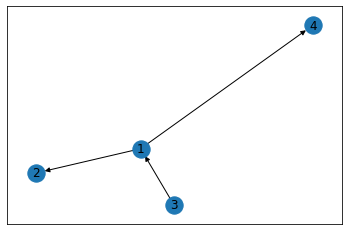

In [113]:
nx.draw_networkx(DG)

In [115]:
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))
print(list(DG.predecessors(1)))
print(DG.out_degree(1))
print(DG.in_degree(1))
print(DG.out_degree(1,weight='weight'))

[2, 4]
[2, 4]
[3]
2
1
0.6


### Connected components

2


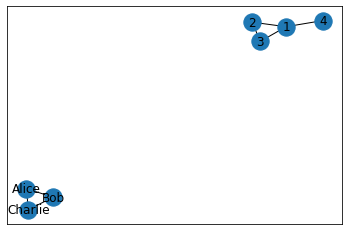

In [118]:
G3.add_edge('1','Alice')
G3.remove_edge('1','Alice') #you can also remove_node, or a list of nodes or edges (remove_nodes_from, remove_edges_from)
G3.add_edge('Alice','Charlie')
G3.add_edge('1','4')
nx.draw_networkx(G3)
print(nx.number_connected_components(G3))

In [119]:
C = nx.connected_components(G3)
print(type(C))
for c in C:
    print(c)

<class 'generator'>
{'2', '3', '1', '4'}
{'Charlie', 'Bob', 'Alice'}


Get the connected component subgraphs

In [120]:
connected_subgraphs = [nx.subgraph(G3,c) for c in nx.connected_components(G3)]
for GC in connected_subgraphs:
    print(GC.nodes())
    print(GC.edges())
    print(len(GC))

['1', '2', '3', '4']
[('1', '2'), ('1', '3'), ('1', '4'), ('2', '3')]
4
['Charlie', 'Bob', 'Alice']
[('Charlie', 'Bob'), ('Charlie', 'Alice'), ('Bob', 'Alice')]
3


Get the largest connected component

In [121]:
# Get the nodes

largest_cc = max(nx.connected_components(G3), key=len)
print(largest_cc)

{'2', '3', '1', '4'}


{'2', '3', '1', '4'}


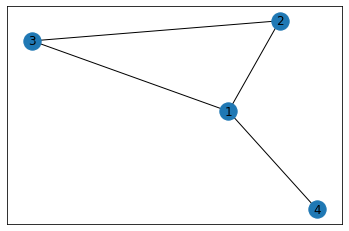

In [122]:
#Get the subgraph

largest_cc = max(nx.connected_components(G3), key=len)
print(largest_cc)
CC_max = nx.subgraph(G3,largest_cc)
nx.draw_networkx(CC_max)

### Shortest paths

['3', '1', 'Alice', 'Bob']
3
3


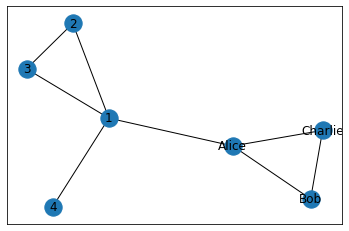

In [123]:
G3.add_edge('1','Alice')
nx.draw_networkx(G3)
sp = nx.shortest_path(G3,'3','Bob')
print(sp)
print(len(sp)-1)
print(nx.shortest_path_length(G3,'3','Bob'))

In [124]:
SP1 = nx.single_source_shortest_path(G3,'1')
print(SP1)
#print(nx.single_source_shortest_path_length(G3,'1'))

{'1': ['1'], '2': ['1', '2'], '3': ['1', '3'], '4': ['1', '4'], 'Alice': ['1', 'Alice'], 'Bob': ['1', 'Alice', 'Bob'], 'Charlie': ['1', 'Alice', 'Charlie']}


In [125]:
SP = dict(nx.all_pairs_shortest_path(G3))
print(SP)

{'1': {'1': ['1'], '2': ['1', '2'], '3': ['1', '3'], '4': ['1', '4'], 'Alice': ['1', 'Alice'], 'Bob': ['1', 'Alice', 'Bob'], 'Charlie': ['1', 'Alice', 'Charlie']}, '2': {'2': ['2'], '1': ['2', '1'], '3': ['2', '3'], '4': ['2', '1', '4'], 'Alice': ['2', '1', 'Alice'], 'Bob': ['2', '1', 'Alice', 'Bob'], 'Charlie': ['2', '1', 'Alice', 'Charlie']}, '3': {'3': ['3'], '1': ['3', '1'], '2': ['3', '2'], '4': ['3', '1', '4'], 'Alice': ['3', '1', 'Alice'], 'Bob': ['3', '1', 'Alice', 'Bob'], 'Charlie': ['3', '1', 'Alice', 'Charlie']}, 'Alice': {'Alice': ['Alice'], 'Bob': ['Alice', 'Bob'], 'Charlie': ['Alice', 'Charlie'], '1': ['Alice', '1'], '2': ['Alice', '1', '2'], '3': ['Alice', '1', '3'], '4': ['Alice', '1', '4']}, 'Bob': {'Bob': ['Bob'], 'Alice': ['Bob', 'Alice'], 'Charlie': ['Bob', 'Charlie'], '1': ['Bob', 'Alice', '1'], '2': ['Bob', 'Alice', '1', '2'], '3': ['Bob', 'Alice', '1', '3'], '4': ['Bob', 'Alice', '1', '4']}, 'Charlie': {'Charlie': ['Charlie'], 'Bob': ['Charlie', 'Bob'], 'Alice': 

In [126]:
print(SP['1']['Bob'])

['1', 'Alice', 'Bob']


### Link Analysis

https://networkx.github.io/documentation/stable/reference/algorithms/link_analysis.html

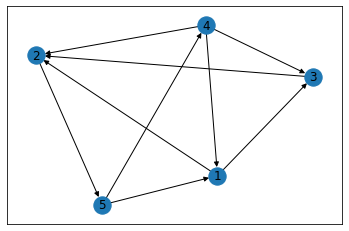

In [127]:
DG2 = nx.DiGraph()
DG2.add_edges_from([(1,2),(1,3),(3,2),(2,5),(4,1),(4,2),(4,3),(5,1),(5,4)])
nx.draw_networkx(DG2)

### Pagerank

In [128]:
pr = nx.pagerank(DG2)
print(pr)

pr = nx.pagerank(G3)
print(pr)

{1: 0.18064505060873787, 2: 0.2713164308772404, 3: 0.14665711544131715, 5: 0.26061906832422166, 4: 0.14076233474848301}
{'1': 0.24203081965436962, '2': 0.12671382905463274, '3': 0.12671382905463274, 'Alice': 0.17987731223897474, 'Bob': 0.12590180503903042, 'Charlie': 0.12590180503903042, '4': 0.0728605999193293}


### HITS

In [129]:
[h,a] = nx.hits(DG2)
print(h)
print(a)
print(a[2])

{1: 0.3028419086392418, 2: 1.3109311069706554e-15, 3: 0.1674519922094525, 5: 0.1254412274444104, 4: 0.40426487170689396}
{1: 0.23681288036482923, 2: 0.3909843234563998, 3: 0.31612245503718484, 5: 3.06089826220615e-15, 4: 0.05608034114158294}
0.3909843234563998


### Pesronalized Pagerank ###

The class example

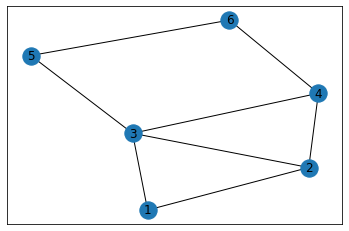

In [130]:
G4 = nx.read_edgelist('graph-example.txt')
nx.draw_networkx(G4)

In [131]:
print(nx.pagerank(G4))
print(nx.pagerank(G4, alpha = 0.5))
print(nx.pagerank(G4, alpha = 0.5, personalization = {'1':1}))
print(nx.pagerank(G4, alpha = 0.5, personalization = {'6':1}))

{'1': 0.1275509986653759, '2': 0.18232887836414124, '3': 0.2394858218322733, '4': 0.18433868256410274, '5': 0.13267870340998367, '6': 0.13361691516412283}
{'1': 0.1390335398088414, '2': 0.17416862981664863, '3': 0.21337523839947284, '4': 0.17643097727783, '5': 0.14740281022602297, '6': 0.14958880447118414}
{'1': 0.5510064790190851, '2': 0.16964493982349704, '3': 0.18185949066208873, '4': 0.054964764048023335, '5': 0.026690643658381363, '6': 0.015833682788924434}
{'1': 0.015833407896886878, '2': 0.039357701756408944, '3': 0.07419162031220411, '4': 0.15675161523961573, '5': 0.150192049257395, '6': 0.5636736055374894}


### Betweeness

In [132]:
BC = nx.edge_betweenness_centrality(G3)
print(BC)

{('1', '2'): 0.23809523809523808, ('1', '3'): 0.23809523809523808, ('1', '4'): 0.2857142857142857, ('1', 'Alice'): 0.5714285714285714, ('2', '3'): 0.047619047619047616, ('Alice', 'Bob'): 0.23809523809523808, ('Alice', 'Charlie'): 0.23809523809523808, ('Bob', 'Charlie'): 0.047619047619047616}


### Drawing Graphs ###

http://networkx.readthedocs.io/en/networkx-1.11/reference/drawing.html

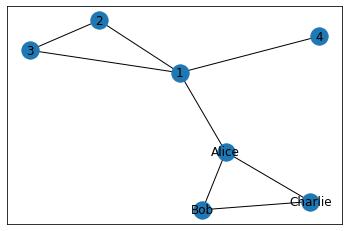

In [133]:
nx.draw_networkx(G3)

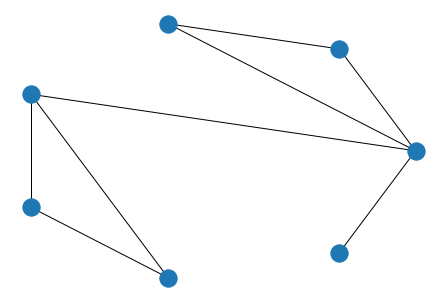

In [134]:
nx.draw_circular(G3)

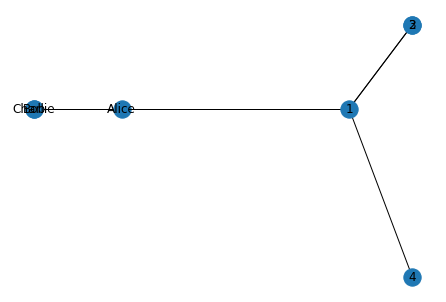

In [138]:
nx.draw_spectral(G3, with_labels=True)

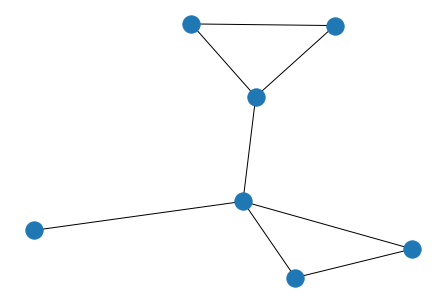

In [139]:
nx.draw_spring(G3)

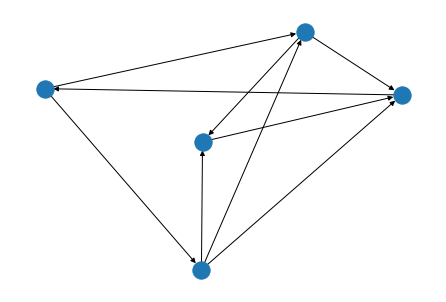

In [140]:
nx.draw_spring(DG2)

### An example ###

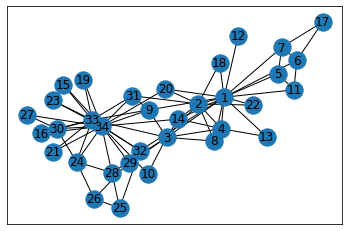

In [141]:
karate=nx.read_gml("karate.gml",label='id')
nx.draw_networkx(karate)

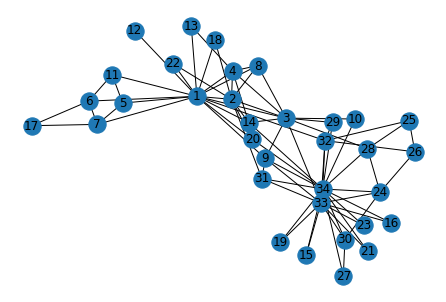

In [143]:
nx.draw_spring(karate,with_labels=True)

Change the size of the nodes depending on their pagerank value

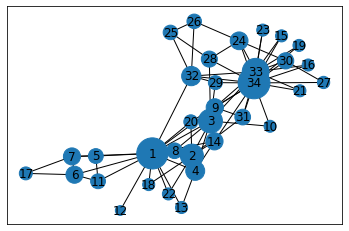

In [144]:
pr = nx.pagerank(karate)
nx.draw_networkx(karate,node_size=[10000*pr[x] for x in pr])

### A PageRank implementation

We will now do our own implementation of Pagerank. Pagerank values for node $i$ are computed by iterating the following formula:

$$p_i = 0.85\sum_{j\rightarrow i}\frac{p_j}{d_{out}(j)} +0.15\frac 1n$$

We will associate each node with two values: the old pagerank in the previous step and the new one that is currently computed. We initialize the old pagerank to $1/n$

In [146]:
for x in karate.nodes:
    karate.nodes[x]['old_pr'] = 1/len(karate.nodes)
    karate.nodes[x]['pr'] = 0;

The algorithm goes over the edges in the graph, and for each edge (x,y) transfers a fraction of the Pagerank of x to y (and vice versa since the graph is undirected).

For convergece check we want the maximum difference between old and new Pagerank values to be less than eps.

In [147]:
eps = 0.0000001
while (True):
    for (x,y) in karate.edges:
        karate.nodes[y]['pr'] += karate.nodes[x]['old_pr']/karate.degree(x)
        karate.nodes[x]['pr'] += karate.nodes[y]['old_pr']/karate.degree(y)

    diff = 0
    for x in karate.nodes:
        karate.nodes[x]['pr'] = karate.nodes[x]['pr']*0.85 + 0.15/len(karate.nodes)
        diff = max(diff, abs(karate.nodes[x]['pr'] - karate.nodes[x]['old_pr']))
    if diff < eps: break
        
    for x in karate.nodes:
        karate.nodes[x]['old_pr'] = karate.nodes[x]['pr']
        karate.nodes[x]['pr'] = 0
        
print({x:karate.nodes[x]['pr'] for x in karate.nodes})

{1: 0.09699768951770414, 2: 0.052877025190054515, 3: 0.05707849169631034, 4: 0.03585995583805577, 5: 0.021978125705124495, 6: 0.029111415561523094, 7: 0.029111415561523094, 8: 0.024490566882881017, 9: 0.029766022059362227, 10: 0.014309373641885614, 11: 0.021978125705124495, 12: 0.009564779215464548, 13: 0.014644945058585735, 14: 0.029536503714110846, 15: 0.01453594661310139, 16: 0.01453594661310139, 17: 0.01678415323052132, 18: 0.014558728934986399, 19: 0.01453594661310139, 20: 0.01960466576621623, 21: 0.01453594661310139, 22: 0.014558728934986399, 23: 0.01453594661310139, 24: 0.03152236472056747, 25: 0.021075945456452493, 26: 0.021006101393715268, 27: 0.015043975625369849, 28: 0.025639673598356803, 29: 0.019573410373247335, 30: 0.026288410971252903, 31: 0.024590112854779363, 32: 0.037157989139649, 33: 0.07169286024483915, 34: 0.10091871034184292}


We got essentially the same values as for the Pagerank vector.

In [148]:
pr

{1: 0.09700181758983709,
 2: 0.05287839103742701,
 3: 0.057078423047636745,
 4: 0.03586064322306479,
 5: 0.021979406974834498,
 6: 0.02911334166344221,
 7: 0.02911334166344221,
 8: 0.024490758039509182,
 9: 0.029765339186167028,
 10: 0.014308950284462801,
 11: 0.021979406974834498,
 12: 0.009564916863537148,
 13: 0.014645186487916191,
 14: 0.029536314977202986,
 15: 0.014535161524273825,
 16: 0.014535161524273825,
 17: 0.016785378110253487,
 18: 0.014558859774243493,
 19: 0.014535161524273825,
 20: 0.019604416711937293,
 21: 0.014535161524273825,
 22: 0.014558859774243493,
 23: 0.014535161524273825,
 24: 0.03152091531163228,
 25: 0.021075455001162945,
 26: 0.021005628174745786,
 27: 0.015043395360629753,
 28: 0.025638803528350497,
 29: 0.01957296050943854,
 30: 0.02628726283711208,
 31: 0.02458933653429248,
 32: 0.03715663592267942,
 33: 0.07169213006588289,
 34: 0.1009179167487121}